In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
split_size = 0.25

In [3]:
df = pd.read_csv('data.csv',sep=';')

In [4]:
'\''.isalpha()

False

In [5]:
column_names = []
for col in df.columns:
    str_col = ''
    for char in col:
        if char.isalpha():
            str_col += char
    column_names.append(str_col)
column_names

['Maritalstatus',
 'Applicationmode',
 'Applicationorder',
 'Course',
 'Daytimeeveningattendance',
 'Previousqualification',
 'Previousqualificationgrade',
 'Nacionality',
 'Mothersqualification',
 'Fathersqualification',
 'Mothersoccupation',
 'Fathersoccupation',
 'Admissiongrade',
 'Displaced',
 'Educationalspecialneeds',
 'Debtor',
 'Tuitionfeesuptodate',
 'Gender',
 'Scholarshipholder',
 'Ageatenrollment',
 'International',
 'Curricularunitsstsemcredited',
 'Curricularunitsstsemenrolled',
 'Curricularunitsstsemevaluations',
 'Curricularunitsstsemapproved',
 'Curricularunitsstsemgrade',
 'Curricularunitsstsemwithoutevaluations',
 'Curricularunitsndsemcredited',
 'Curricularunitsndsemenrolled',
 'Curricularunitsndsemevaluations',
 'Curricularunitsndsemapproved',
 'Curricularunitsndsemgrade',
 'Curricularunitsndsemwithoutevaluations',
 'Unemploymentrate',
 'Inflationrate',
 'GDP',
 'Target']

In [6]:
for col, new_col in zip(df.columns,column_names):
    df.rename(columns={col: col.replace(col, new_col)}, inplace=True)

In [7]:
df.columns

Index(['Maritalstatus', 'Applicationmode', 'Applicationorder', 'Course',
       'Daytimeeveningattendance', 'Previousqualification',
       'Previousqualificationgrade', 'Nacionality', 'Mothersqualification',
       'Fathersqualification', 'Mothersoccupation', 'Fathersoccupation',
       'Admissiongrade', 'Displaced', 'Educationalspecialneeds', 'Debtor',
       'Tuitionfeesuptodate', 'Gender', 'Scholarshipholder', 'Ageatenrollment',
       'International', 'Curricularunitsstsemcredited',
       'Curricularunitsstsemenrolled', 'Curricularunitsstsemevaluations',
       'Curricularunitsstsemapproved', 'Curricularunitsstsemgrade',
       'Curricularunitsstsemwithoutevaluations',
       'Curricularunitsndsemcredited', 'Curricularunitsndsemenrolled',
       'Curricularunitsndsemevaluations', 'Curricularunitsndsemapproved',
       'Curricularunitsndsemgrade', 'Curricularunitsndsemwithoutevaluations',
       'Unemploymentrate', 'Inflationrate', 'GDP', 'Target'],
      dtype='object')

In [8]:
df.head()

,Maritalstatus,Applicationmode,Applicationorder,Course,Daytimeeveningattendance,Previousqualification,Previousqualificationgrade,Nacionality,Mothersqualification,Fathersqualification,...,Curricularunitsndsemcredited,Curricularunitsndsemenrolled,Curricularunitsndsemevaluations,Curricularunitsndsemapproved,Curricularunitsndsemgrade,Curricularunitsndsemwithoutevaluations,Unemploymentrate,Inflationrate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
# df.drop(df.index[30:40], inplace=True)
# df.drop(df.index[105:115], inplace=True)
df.drop(df.index[0:1000], inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Maritalstatus                             0
Applicationmode                           0
Applicationorder                          0
Course                                    0
Daytimeeveningattendance                  0
Previousqualification                     0
Previousqualificationgrade                0
Nacionality                               0
Mothersqualification                      0
Fathersqualification                      0
Mothersoccupation                         0
Fathersoccupation                         0
Admissiongrade                            0
Displaced                                 0
Educationalspecialneeds                   0
Debtor                                    0
Tuitionfeesuptodate                       0
Gender                                    0
Scholarshipholder                         0
Ageatenrollment                           0
International                             0
Curricularunitsstsemcredited              0
Curricularunitsstsemenrolled    

In [12]:
# drop irrelevant features
clean_df = df.drop(['Applicationmode','Applicationorder'],axis=1)
clean_df

,Maritalstatus,Course,Daytimeeveningattendance,Previousqualification,Previousqualificationgrade,Nacionality,Mothersqualification,Fathersqualification,Mothersoccupation,Fathersoccupation,...,Curricularunitsndsemcredited,Curricularunitsndsemenrolled,Curricularunitsndsemevaluations,Curricularunitsndsemapproved,Curricularunitsndsemgrade,Curricularunitsndsemwithoutevaluations,Unemploymentrate,Inflationrate,GDP,Target
1000,1,9070,1,1,132.0,1,38,1,5,5,...,0,6,0,0,0.000000,0,15.5,2.8,-4.06,Dropout
1001,1,9670,1,1,116.0,1,19,38,9,9,...,0,6,0,0,0.000000,0,8.9,1.4,3.51,Dropout
1002,1,171,1,1,163.0,1,3,4,2,5,...,0,0,0,0,0.000000,0,11.1,0.6,2.02,Graduate
1003,1,9147,1,1,122.0,1,19,19,7,7,...,0,5,5,3,11.000000,0,12.4,0.5,1.79,Graduate
1004,1,9238,1,1,136.0,1,1,3,3,4,...,0,6,7,6,17.428571,0,11.1,0.6,2.02,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,9773,1,1,125.0,1,1,1,5,4,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,9773,1,1,120.0,105,1,1,9,9,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,9500,1,1,154.0,1,37,37,9,9,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,9147,1,1,180.0,1,37,37,7,4,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [13]:
clean_df.Target.value_counts()

Target
Graduate    1676
Dropout     1129
Enrolled     619
Name: count, dtype: int64

C:\Users\atuls\AppData\Local\Temp\ipykernel_14640\3639645500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=clean_df, palette='hls')


Text(0.5, 0, 'Status')

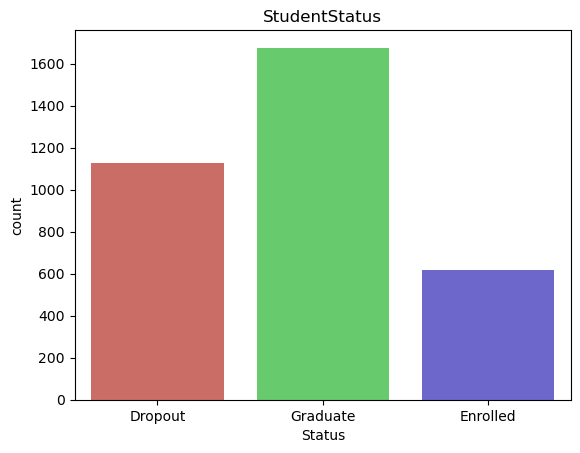

In [14]:
plt.title('StudentStatus')

sns.countplot(x='Target', data=clean_df, palette='hls')
plt.xlabel('Status')

In [15]:
pivot_table = df.pivot_table(index=['Scholarshipholder','Gender'], columns='Target', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100
pivot_table_percentage

Target                      Dropout   Enrolled   Graduate
Scholarshipholder Gender                                 
0                 0       41.364039  47.495961  42.720764
                  1       49.069973  36.187399  18.914081
1                 0        6.200177  10.339257  30.548926
                  1        3.365810   5.977383   7.816229

In [16]:
pivot_table

Target                    Dropout  Enrolled  Graduate
Scholarshipholder Gender                             
0                 0           467       294       716
                  1           554       224       317
1                 0            70        64       512
                  1            38        37       131

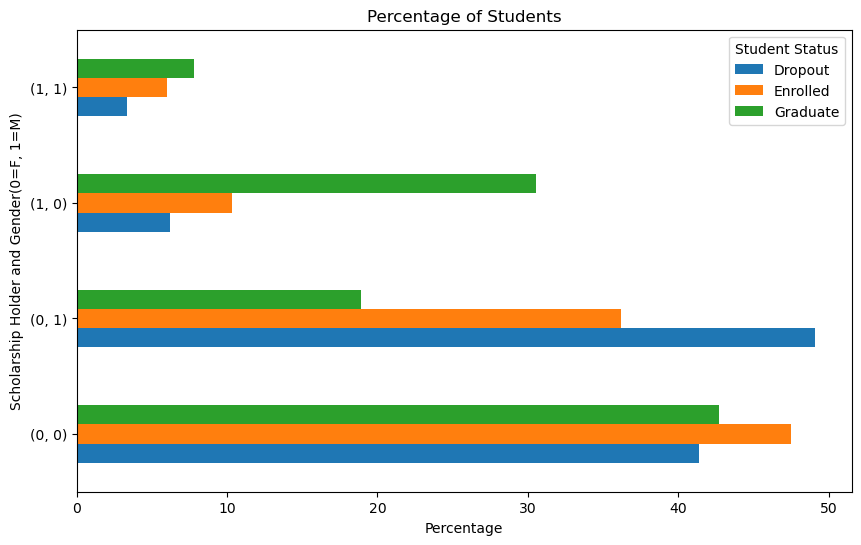

In [17]:
pivot_table_percentage.plot(kind='barh', stacked=False, figsize=(10, 6))
plt.title('Percentage of Students')
plt.xlabel('Percentage')
plt.ylabel('Scholarship Holder and Gender(0=F, 1=M)')
plt.legend(title='Student Status', loc='best')
plt.show()

In [18]:
numerical_features = ['Previousqualificationgrade', 'Admissiongrade','Ageatenrollment','Unemploymentrate', 'Inflationrate', 'GDP']
for col in clean_df.columns:
    if 'Curricular' in col:
        numerical_features.append(col)
numerical_features

['Previousqualificationgrade',
 'Admissiongrade',
 'Ageatenrollment',
 'Unemploymentrate',
 'Inflationrate',
 'GDP',
 'Curricularunitsstsemcredited',
 'Curricularunitsstsemenrolled',
 'Curricularunitsstsemevaluations',
 'Curricularunitsstsemapproved',
 'Curricularunitsstsemgrade',
 'Curricularunitsstsemwithoutevaluations',
 'Curricularunitsndsemcredited',
 'Curricularunitsndsemenrolled',
 'Curricularunitsndsemevaluations',
 'Curricularunitsndsemapproved',
 'Curricularunitsndsemgrade',
 'Curricularunitsndsemwithoutevaluations']

In [19]:
categorical_features = []
for col in clean_df.columns:
    if col in numerical_features:
        pass
    else:
        categorical_features.append(col)
categorical_features.remove('Target')
categorical_features

['Maritalstatus',
 'Course',
 'Daytimeeveningattendance',
 'Previousqualification',
 'Nacionality',
 'Mothersqualification',
 'Fathersqualification',
 'Mothersoccupation',
 'Fathersoccupation',
 'Displaced',
 'Educationalspecialneeds',
 'Debtor',
 'Tuitionfeesuptodate',
 'Gender',
 'Scholarshipholder',
 'International']

In [20]:
import scipy.stats as stats

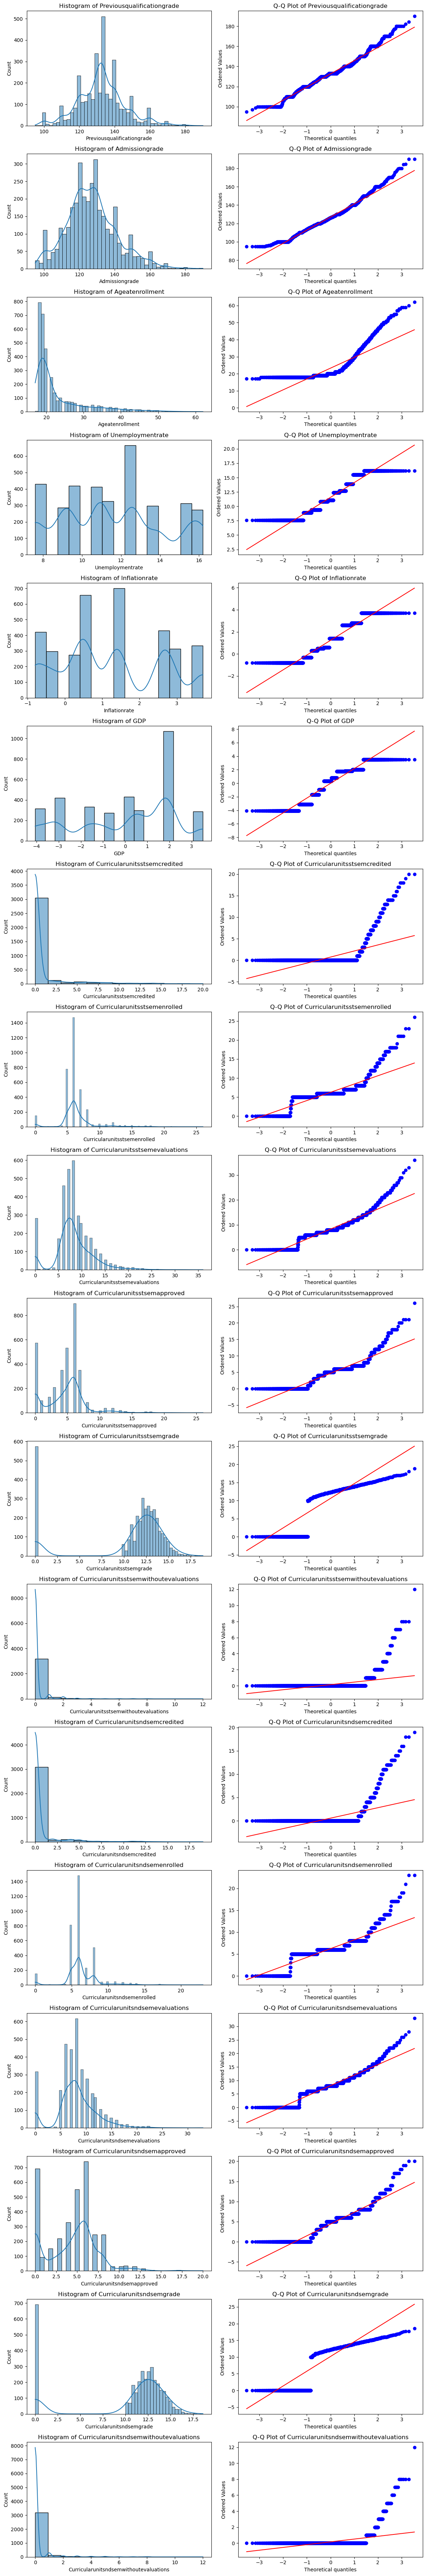

In [21]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, 4 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(clean_df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    # Q-Q plot
    stats.probplot(clean_df[feature], dist="norm", plot=axes[i, 1])
    axes[i, 1].get_lines()[1].set_color('r')  # Line color
    axes[i, 1].set_title(f'Q-Q Plot of {feature}')

plt.tight_layout()
plt.show()


In [22]:
scaler = StandardScaler()

In [23]:
num_df = clean_df[numerical_features]
num_df

,Previousqualificationgrade,Admissiongrade,Ageatenrollment,Unemploymentrate,Inflationrate,GDP,Curricularunitsstsemcredited,Curricularunitsstsemenrolled,Curricularunitsstsemevaluations,Curricularunitsstsemapproved,Curricularunitsstsemgrade,Curricularunitsstsemwithoutevaluations,Curricularunitsndsemcredited,Curricularunitsndsemenrolled,Curricularunitsndsemevaluations,Curricularunitsndsemapproved,Curricularunitsndsemgrade,Curricularunitsndsemwithoutevaluations
1000,132.0,124.3,18,15.5,2.8,-4.06,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0
1001,116.0,119.5,18,8.9,1.4,3.51,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0
1002,163.0,175.6,18,11.1,0.6,2.02,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0
1003,122.0,116.1,19,12.4,0.5,1.79,0,5,8,5,11.200000,0,0,5,5,3,11.000000,0
1004,136.0,126.6,18,11.1,0.6,2.02,0,6,6,6,16.500000,0,0,6,7,6,17.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,125.0,122.2,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0
4420,120.0,119.0,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0
4421,154.0,149.5,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0
4422,180.0,153.8,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0


In [24]:
num_df_scaled = scaler.fit_transform(num_df)
num_df_scaled = pd.DataFrame(num_df_scaled, columns=num_df.columns)
num_df_scaled

,Previousqualificationgrade,Admissiongrade,Ageatenrollment,Unemploymentrate,Inflationrate,GDP,Curricularunitsstsemcredited,Curricularunitsstsemenrolled,Curricularunitsstsemevaluations,Curricularunitsstsemapproved,Curricularunitsstsemgrade,Curricularunitsstsemwithoutevaluations,Curricularunitsndsemcredited,Curricularunitsndsemenrolled,Curricularunitsndsemevaluations,Curricularunitsndsemapproved,Curricularunitsndsemgrade,Curricularunitsndsemwithoutevaluations
0,-0.049223,-0.184904,-0.700136,1.483755,1.128132,-1.772111,-0.303093,-0.107815,-1.968379,-1.492650,-2.156530,-0.20591,-0.283592,-0.101385,-2.015386,-1.445260,-1.933919,-0.203595
1,-1.259175,-0.517651,-0.700136,-1.005221,0.119814,1.543651,-0.303093,-0.107815,-1.968379,-1.492650,-2.156530,-0.20591,-0.283592,-0.101385,-2.015386,-1.445260,-1.933919,-0.203595
2,2.295059,3.371326,-0.700136,-0.175562,-0.456369,0.891011,-0.303093,-2.474209,-1.968379,-1.492650,-2.156530,-0.20591,-0.283592,-2.754689,-2.015386,-1.445260,-1.933919,-0.203595
3,-0.805443,-0.753347,-0.567434,0.314691,-0.528391,0.790268,-0.303093,-0.502214,-0.073666,0.105584,0.124268,-0.20591,-0.283592,-0.543602,-0.769910,-0.461384,0.159575,-0.203595
4,0.253265,-0.025463,-0.700136,-0.175562,-0.456369,0.891011,-0.303093,-0.107815,-0.547345,0.425231,1.203574,-0.20591,-0.283592,-0.101385,-0.271720,0.522493,1.383046,-0.203595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,-0.578577,-0.330481,-0.567434,1.483755,1.128132,-1.772111,-0.303093,-0.107815,-0.310505,0.105584,0.613010,-0.20591,-0.283592,-0.101385,-0.022625,0.194534,0.476772,-0.203595
3420,-0.956687,-0.552312,-0.700136,-0.175562,-0.456369,0.891011,-0.303093,-0.107815,-0.547345,0.425231,0.287182,-0.20591,-0.283592,-0.101385,-0.520815,-0.789343,0.159575,-0.203595
3421,1.614461,1.562016,0.892291,0.880367,-1.104573,0.352254,-0.303093,0.286584,-0.073666,0.744878,0.880291,-0.20591,-0.283592,0.783050,0.226470,-1.117301,0.635370,-0.203595
3422,3.580633,1.860101,-0.434732,-0.816662,-1.464687,-1.360379,-0.303093,-0.502214,-0.784184,0.105584,0.653739,-0.20591,-0.283592,-0.543602,-0.520815,0.194534,0.349893,-0.203595


In [25]:
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()

In [26]:
X = num_df_scaled
y = clean_df['Target']

In [27]:
X_train, X_test_cont, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=10)

In [28]:
gauss_nb.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred = gauss_nb.predict(X_test_cont)


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
accuracy_score(y_test, y_pred)

0.699623352165725

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.83      0.60      0.69       360
    Enrolled       0.40      0.53      0.46       184
    Graduate       0.77      0.83      0.80       518

    accuracy                           0.70      1062
   macro avg       0.67      0.65      0.65      1062
weighted avg       0.72      0.70      0.70      1062



In [33]:
report = classification_report(y_test, y_pred)

In [34]:
report

'              precision    recall  f1-score   support\n\n     Dropout       0.83      0.60      0.69       360\n    Enrolled       0.40      0.53      0.46       184\n    Graduate       0.77      0.83      0.80       518\n\n    accuracy                           0.70      1062\n   macro avg       0.67      0.65      0.65      1062\nweighted avg       0.72      0.70      0.70      1062\n'

In [35]:
with open('classification_report.txt', 'w') as f:
    f.write('Gaussian Naive Bayes\n\n')
    f.write(report)
    f.close()

In [ ]:
class_labels = ['Dropout', 'Graduate', 'Enrolled']

In [54]:
clean_df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [57]:
y

1000     Dropout
1001     Dropout
1002    Graduate
1003    Graduate
1004     Dropout
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 3424, dtype: object

In [56]:
y_encoded

,Target
0,0.0
1,0.0
2,2.0
3,2.0
4,0.0
...,...
3419,2.0
3420,0.0
3421,0.0
3422,2.0


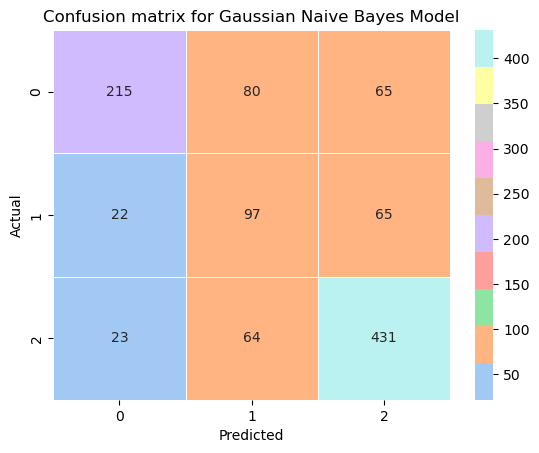

In [36]:
plt.title('Confusion matrix for Gaussian Naive Bayes Model')
sns.heatmap(confusion_matrix(y_test, y_pred),cmap=sns.color_palette('pastel'), annot=True, fmt='.0f', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Categorical

In [37]:
cat_df = clean_df[categorical_features]
oe = OrdinalEncoder()
cat_df_encoded = oe.fit_transform(cat_df)
cat_df_encoded = pd.DataFrame(cat_df_encoded, columns=categorical_features)

In [38]:
cat_df_encoded.head()

,Maritalstatus,Course,Daytimeeveningattendance,Previousqualification,Nacionality,Mothersqualification,Fathersqualification,Mothersoccupation,Fathersoccupation,Displaced,Educationalspecialneeds,Debtor,Tuitionfeesuptodate,Gender,Scholarshipholder,International
0,0.0,4.0,1.0,0.0,0.0,22.0,0.0,5.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,13.0,1.0,0.0,0.0,12.0,26.0,9.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,2.0,3.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,8.0,1.0,0.0,0.0,12.0,13.0,7.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,9.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
from sklearn.naive_bayes import CategoricalNB
cat_nb = CategoricalNB()

In [40]:
X = cat_df
y = clean_df['Target']
# X.drop(X.iloc[30:40], inplace=True, axis=0)
# y.drop(y.iloc[30:40], inplace=True, axis=0)
X.columns


Index(['Maritalstatus', 'Course', 'Daytimeeveningattendance',
       'Previousqualification', 'Nacionality', 'Mothersqualification',
       'Fathersqualification', 'Mothersoccupation', 'Fathersoccupation',
       'Displaced', 'Educationalspecialneeds', 'Debtor', 'Tuitionfeesuptodate',
       'Gender', 'Scholarshipholder', 'International'],
      dtype='object')

In [41]:
y_encoded = oe.fit_transform(pd.DataFrame(y))

In [42]:
y_encoded = pd.DataFrame(y_encoded, columns=['Target'])
y_encoded

,Target
0,0.0
1,0.0
2,2.0
3,2.0
4,0.0
...,...
3419,2.0
3420,0.0
3421,0.0
3422,2.0


In [43]:
X_train, X_test_cat, y_train, y_test = train_test_split(X, y_encoded, test_size=split_size, random_state=10)

In [44]:
cat_nb.fit(X_train, y_train)

c:\Users\atuls\miniconda3\envs\DM\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

In [45]:
y_pred = cat_nb.predict(X_test_cat)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.66      0.57      0.61       360\n         1.0       0.48      0.05      0.10       184\n         2.0       0.61      0.86      0.72       518\n\n    accuracy                           0.62      1062\n   macro avg       0.58      0.50      0.48      1062\nweighted avg       0.61      0.62      0.57      1062\n'

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61       360
         1.0       0.48      0.05      0.10       184
         2.0       0.61      0.86      0.72       518

    accuracy                           0.62      1062
   macro avg       0.58      0.50      0.48      1062
weighted avg       0.61      0.62      0.57      1062



In [47]:
with open('classification_report.txt', 'a') as f:
    f.write('\n\nCategorical Naive Bayes\n\n')
    f.write(classification_report(y_test, y_pred))
    f.close()

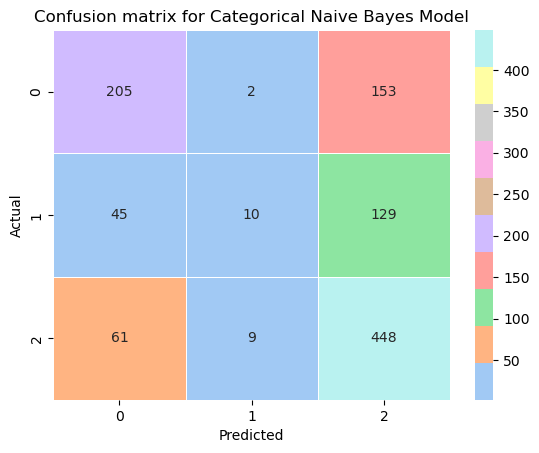

In [48]:
plt.title('Confusion matrix for Categorical Naive Bayes Model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('pastel'),linewidths=0.5, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
import numpy as np

cat_probs = cat_nb.predict_proba(X_test_cat)
cont_probs = gauss_nb.predict_proba(X_test_cont)
combined_probs = cont_probs * cat_probs
y_pred_combined = np.argmax(combined_probs, axis=1)
print(classification_report(y_test, y_pred_combined))

              precision    recall  f1-score   support

         0.0       0.81      0.69      0.75       360
         1.0       0.51      0.20      0.28       184
         2.0       0.70      0.93      0.80       518

    accuracy                           0.72      1062
   macro avg       0.67      0.61      0.61      1062
weighted avg       0.71      0.72      0.69      1062



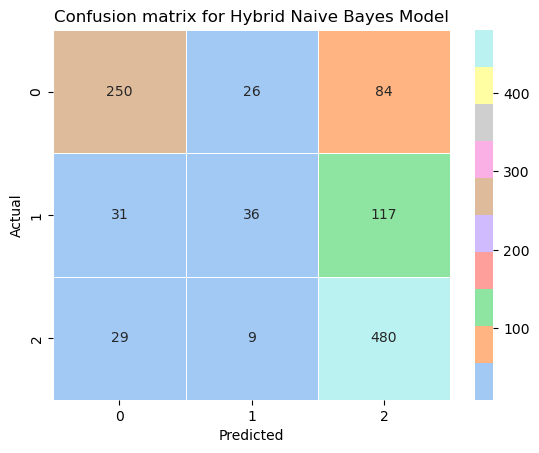

In [50]:
plt.title('Confusion matrix for Hybrid Naive Bayes Model')
sns.heatmap(confusion_matrix(y_test, y_pred_combined), annot=True, cmap=sns.color_palette('pastel'),linewidths=0.5, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
with open('classification_report.txt', 'a') as f:
    f.write('\n\Hybrid Naive Bayes\n\n')
    f.write(classification_report(y_test, y_pred_combined))
    f.close()